In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

Возьмем датасет [отсюда](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset).

In [2]:
df = pd.read_csv("./data/framingham.csv")

In [3]:
# посмотрим на sample датасета
df.head(5)
df.tail(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [4]:
# посмотрим на признаки и инфу о них
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# посмотрим, есть ли пропущенные значения
df.isna()
df.isna().sum()
df.isna().sum() / len(df)

male               0.000000
age                0.000000
education          0.024764
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.091509
TenYearCHD         0.000000
dtype: float64

In [15]:
# что будем делать с NaN-ами?
# что вообще можно с ними делать? (3 варианта) -> удалить; заполнить - 0, mean, std; предсказать;
# df.dropna()
df = df.fillna(df.mean())
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


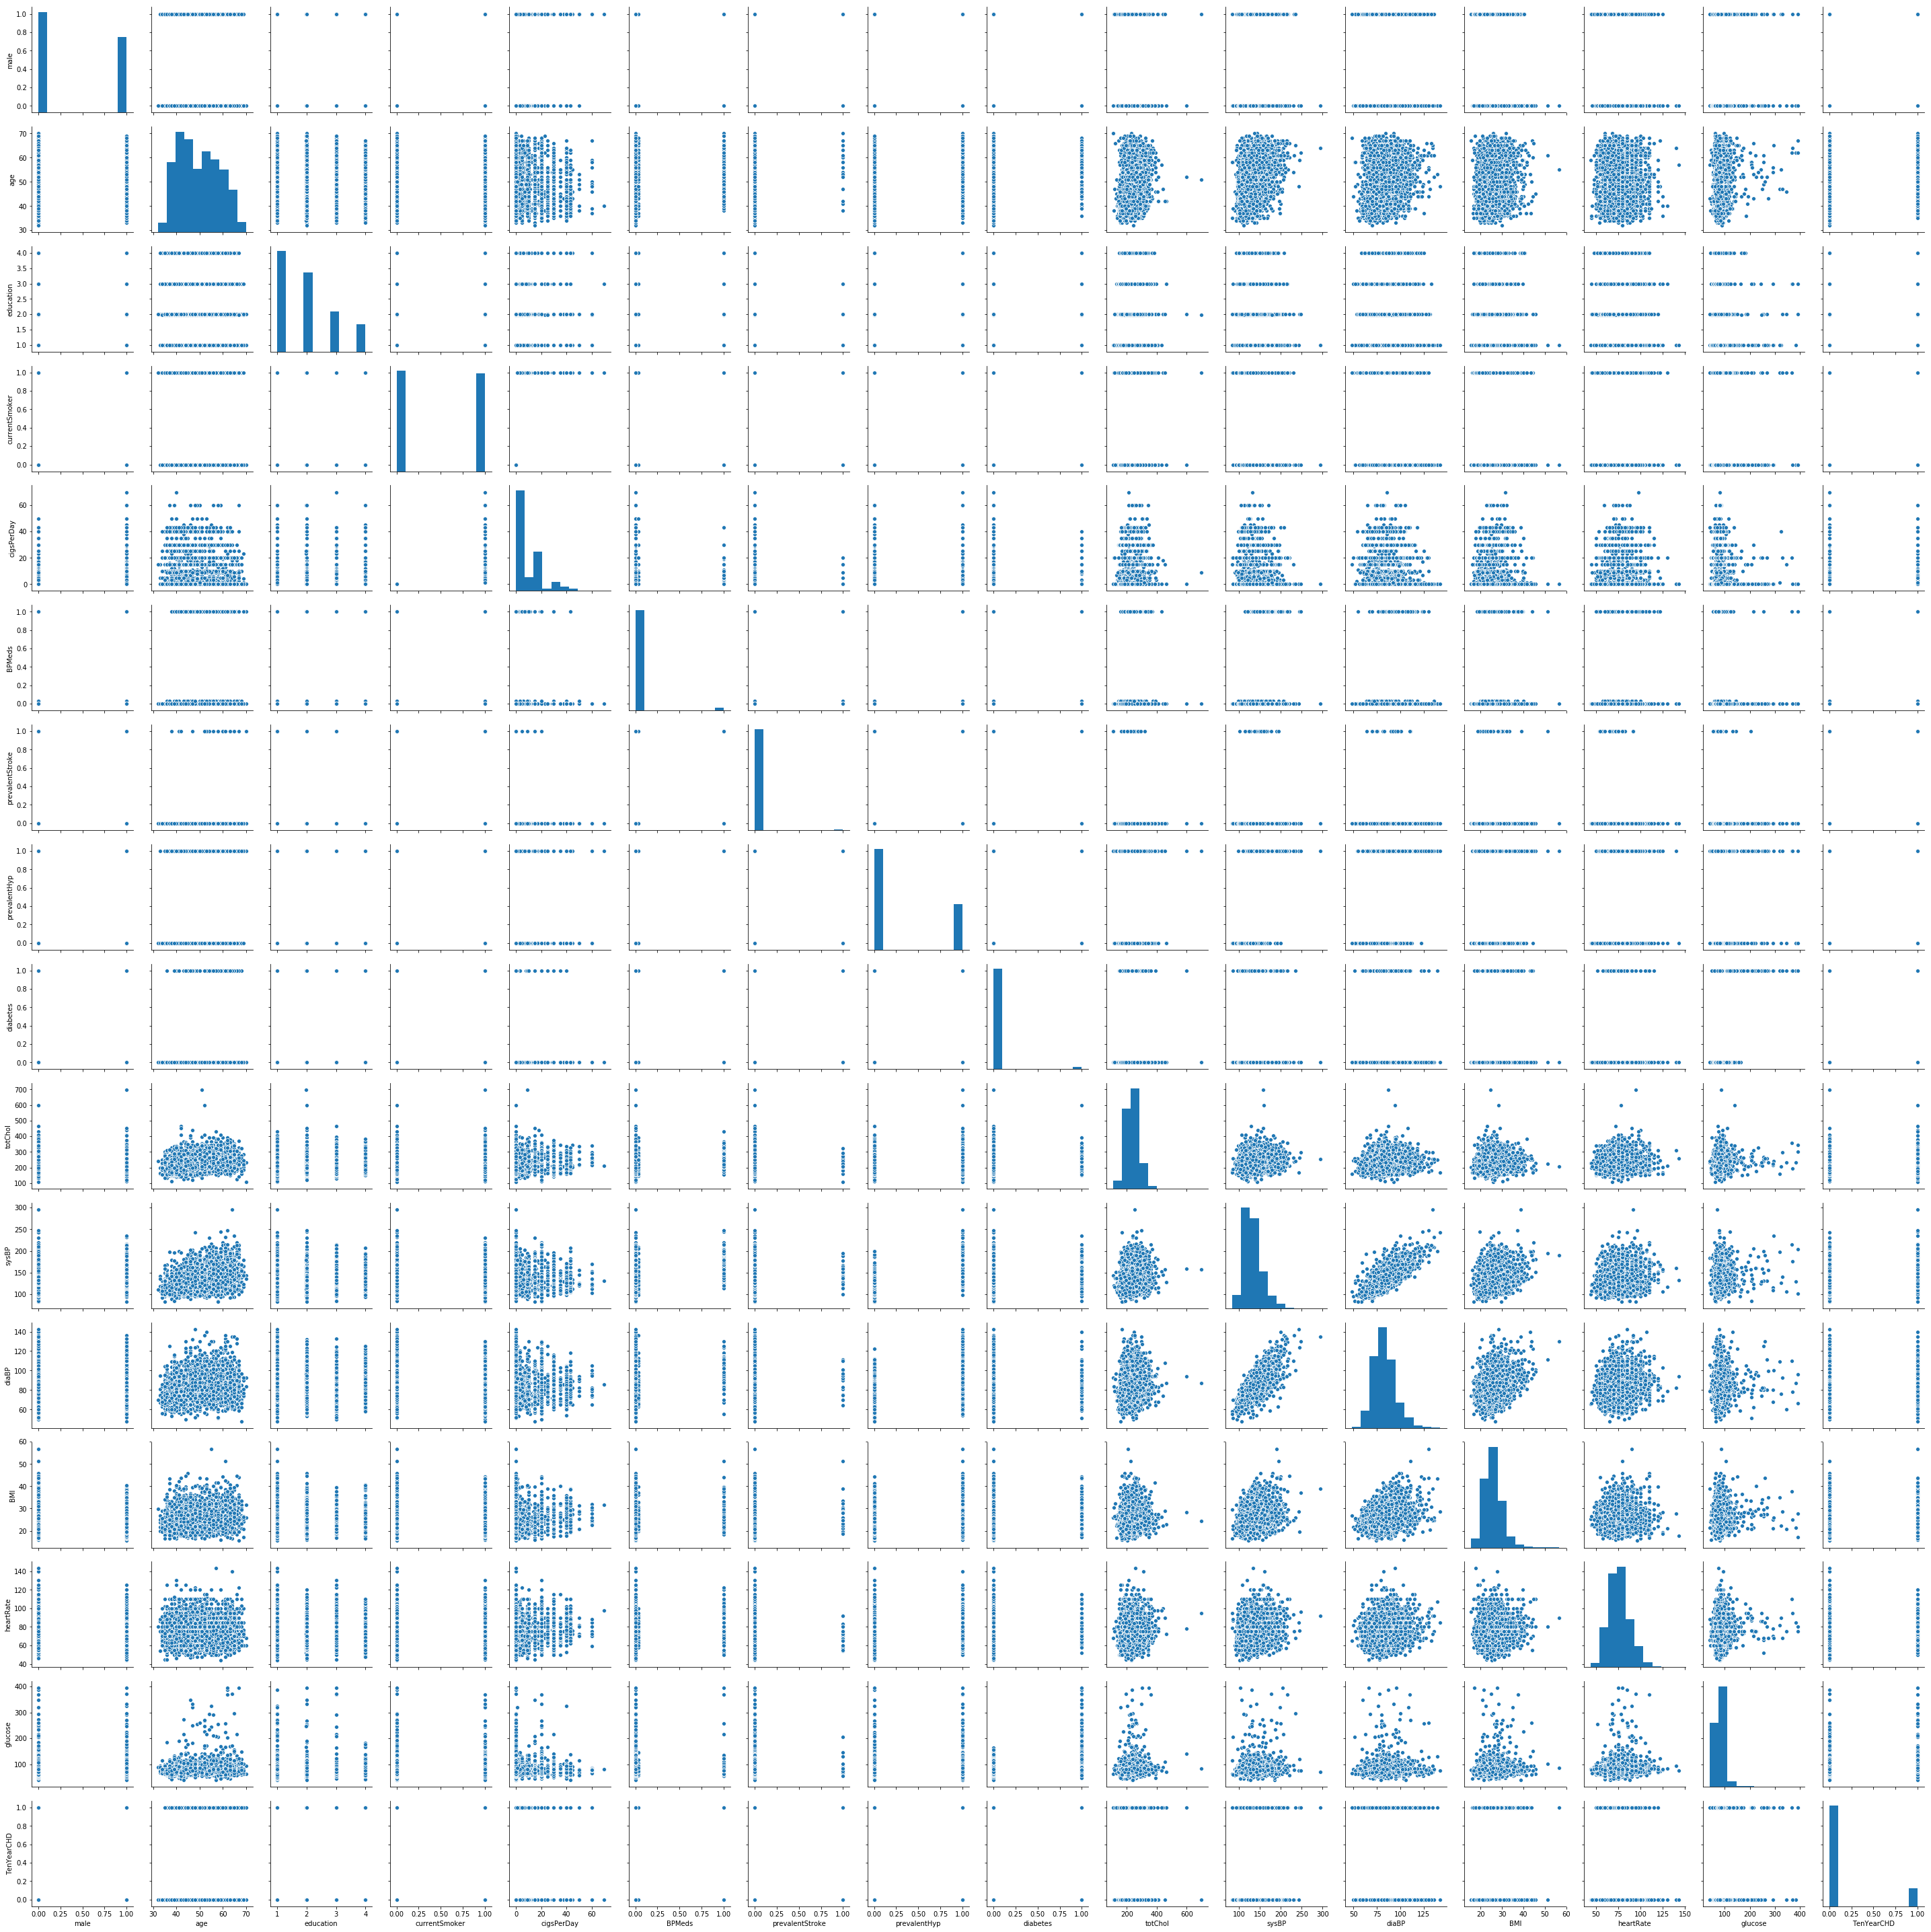

In [16]:
# посмотрим на распределения значений признаков (и таргета)
sns.pairplot(df)

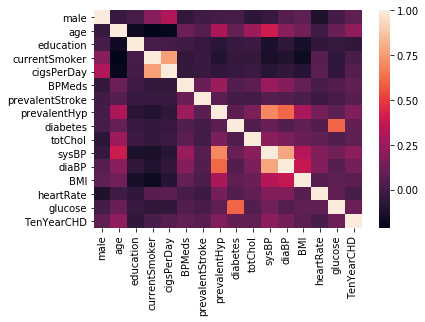

In [17]:
# посмотрим на корреляцию между признаками
sns.heatmap(df.corr())

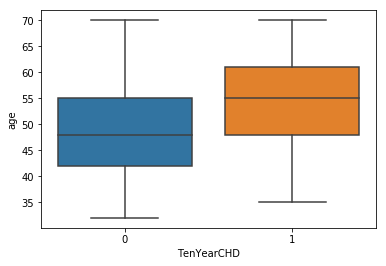

In [20]:
# что такое boxplot?
# посмотрим на него (них)
# sns.boxplot(y=df['cigsPerDay'], x=df['TenYearCHD'], orient='v')
sns.boxplot(y=df['age'], x=df['TenYearCHD'], orient='v')

In [49]:
# разделим данные на train и test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(['TenYearCHD'], axis=1),
    df['TenYearCHD'],
    test_size=0.33,
    random_state=42
)

In [50]:
# выберем категориальные признаки
cat_features = [
    'male', 'currentSmoker',
    'education', 'prevalentStroke',
    'prevalentHyp', 'diabetes'
]

In [51]:
# выполним нормализацию (зачем она, кстати, нужна)?
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_train_quant_features = standard_scaler.fit_transform(
    X_train[list(set(X_train.columns) - set(cat_features))]
)

X_test_quant_features = standard_scaler.transform(
    X_test[list(set(X_test.columns) - set(cat_features))]
)

/home/dcibisof/.local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dcibisof/.local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/dcibisof/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [52]:
# поработаем с категориальными признаками
# df["education"].unique()  # 1.97944377 мы подставили для NAN mean, но он не очень удачен
pd.get_dummies(df["education"]).head()

pd.get_dummies(X_train[cat_features]).head()

# более хороший вариант
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

X_train_cat_features = one_hot_encoder.fit_transform(X_train[cat_features])

X_test_cat_features = one_hot_encoder.transform(X_test[cat_features])

/home/dcibisof/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [53]:
X_train_ready = pd.concat(
    [
        pd.DataFrame(X_train_quant_features),
        pd.DataFrame(X_train_cat_features)
    ],
    axis=1
)

X_test_ready = pd.concat(
    [
        pd.DataFrame(X_test_quant_features),
        pd.DataFrame(X_test_cat_features)
    ],
    axis=1
)

In [54]:
X_train_ready.head()
X_test_ready.head()

,0,1,2,3,4,5,6,7,8,0
0,-0.176148,0.069186,-0.800813,-0.065863,-1.078247,-0.664049,0.544296,-0.249467,-0.425708,"(0, 12)\t1.0\n (0, 10)\t1.0\n (0, 8)\t1.0\..."
1,-0.176148,1.347912,0.439942,-0.767747,-0.496422,-0.483991,-0.844758,-0.081131,-0.516724,"(0, 12)\t1.0\n (0, 10)\t1.0\n (0, 8)\t1.0\..."
2,-0.176148,-0.698050,-0.371320,-0.533786,-0.579540,0.708285,0.944532,0.087206,0.347928,"(0, 12)\t1.0\n (0, 11)\t1.0\n (0, 8)\t1.0\..."
3,-0.176148,0.069186,-0.371320,1.571865,-1.327601,0.506328,-0.020743,1.686404,2.577821,"(0, 12)\t1.0\n (0, 11)\t1.0\n (0, 8)\t1.0\..."
4,-0.176148,-0.783298,0.583106,1.103942,1.165938,-0.403695,0.002800,0.087206,-0.038890,"(0, 12)\t1.0\n (0, 10)\t1.0\n (0, 8)\t1.0\..."


In [55]:
# обучим логистическую регресиию
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_ready, Y_train)

/home/dcibisof/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: setting an array element with a sequence.

In [ ]:
# оценим качество